In [42]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime
from collections import defaultdict

In [33]:
data = np.loadtxt('graph.txt', skiprows=3)
data = data.astype('int')

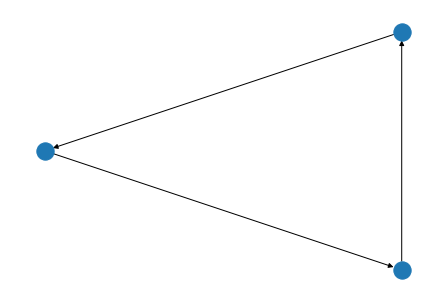

In [34]:
#Draw initial image - triangle
G_triangle = nx.DiGraph()
G_triangle.add_nodes_from([0,1,2])
G_triangle.add_edges_from([(0,1),(1,2),(2,0)])
nx.draw_shell(G_triangle)

In [36]:
def fun_operation(G, x, data):
    Pr = 0
    a = np.log(0.5)
    b = np.log(0.5)
    for i in range(data.shape[0]):
        #With probability α, a new vertex is added and an edge coming out of it into one of the existing nt−1 vertices v with probability
        if data[i][0] not in G.nodes(): 
            #
            Pr = Pr+ a + np.log( (G.in_degree(data[i][1]) + x) / (x * G.number_of_nodes()+i+3) )
            G.add_node(i+3)
            G.add_edge(data[i][0], data[i][1])
        #With probability β, no new vertices are added, but an edge is added from an existing vertex v to an existing vertex w, where v and w are chosen independently
        else: 
            Pr = Pr + b + np.log(G.out_degree(data[i][0])/(i+3) )+ np.log((G.in_degree(data[i][1])+x) / (x*G.number_of_nodes()+i+3))
            G.add_edge(data[i][0], data[i][1])
    return Pr

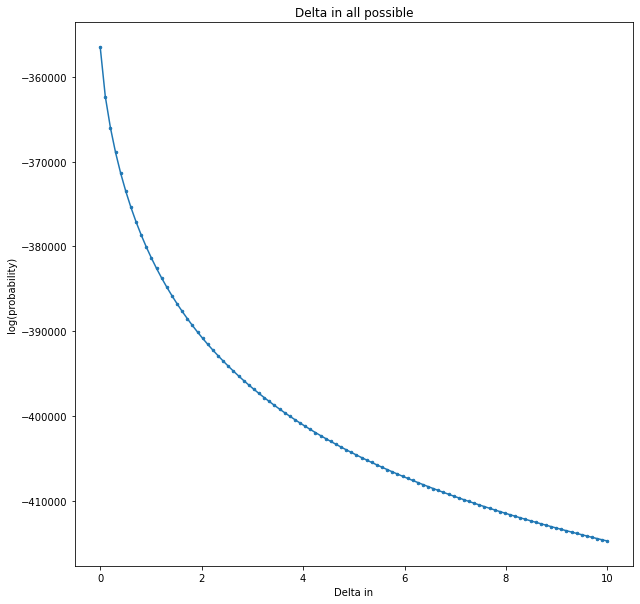

In [41]:
x_list = np.linspace(0,10,100)
y_list=[]
for i in x_list:
    y_list.append(fun_operation(G = G_triangle, x= i, data = data))

plt.figure(figsize=(10,10))
plt.plot(x_list, y_list, marker = '.', markersize = 5)
plt.title("Delta in all possible")
plt.xlabel("Delta in")
plt.ylabel("log(probability)")
plt.show()

In [40]:
print("According to the image available, the best delta in value is 0")

According to the image available, the best delta in value is 0
